In [1]:
import bz2
import gc
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
with bz2.open('09_prepared.pkl.bz2', 'rb') as sep:
    d_sep = pickle.load(sep)

In [3]:
with bz2.open('10_prepared.pkl.bz2', 'rb') as octo:
    d_octo = pickle.load(octo)

In [4]:
with bz2.open('11_prepared.pkl.bz2', 'rb') as nov:
    d_nov = pickle.load(nov)

In [5]:
df = pd.concat([d_sep, d_octo, d_nov])
d_sep.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341


In [6]:
d_sep.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07
mean,7.765869e+05,1.763064e+04,1.045977e+04,1.427065e+00,1.149112e+02,8.446032e+05,1.170384e+07
std,2.032896e+06,1.103226e+04,8.794764e+03,3.101411e+01,1.072201e+02,5.388947e+05,6.760102e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,2.000000e+00
25%,0.000000e+00,1.452600e+04,3.850000e+02,1.000000e+00,4.800000e+01,3.650470e+05,5.848724e+06
50%,0.000000e+00,1.943500e+04,1.358100e+04,1.000000e+00,8.900000e+01,8.150010e+05,1.170182e+07
75%,0.000000e+00,2.455800e+04,1.630400e+04,1.000000e+00,1.501100e+02,1.288708e+06,1.755596e+07
max,6.673056e+06,3.866000e+04,2.194300e+04,5.000000e+03,3.840000e+04,1.944074e+06,2.341787e+07


In [7]:
group = df.groupby("id_card_int")["id_doc_int"]
df_agg = group.agg("nunique")
df_agg.nlargest(10)

id_card_int
883386     316277
1387578       454
914348        439
317600        414
531034        411
542660        378
421742        374
1407478       360
137816        356
620767        348
Name: id_doc_int, dtype: int64

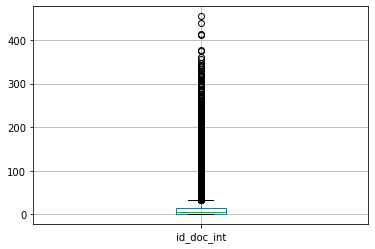

In [8]:
pd.DataFrame(df_agg[df_agg < 1000]).boxplot()

In [9]:
suspects = df_agg[df_agg > 400].index.tolist()

In [10]:
group = df.groupby("id_card_int")["id_tov"]
df_agg = group.agg("nunique")

In [11]:
df_agg.nlargest(10)

id_card_int
883386     3791
213748      796
518424      701
425024      687
13789       637
1158454     635
1543652     630
817278      628
533540      627
1447941     617
Name: id_tov, dtype: int64

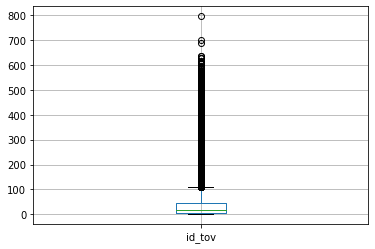

In [12]:
pd.DataFrame(df_agg[df_agg < 1000]).boxplot()

In [13]:
suspects.extend(df_agg[df_agg > 650].index.tolist())

In [14]:
group = df.groupby("id_card_int")["sum"]
df_agg = group.agg("sum")

In [15]:
df_agg.nlargest(10)

id_card_int
883386     60016231.51
1577248     1279932.55
568930       379927.61
1028081      292730.00
497966       284392.33
1447941      283574.98
588107       276153.31
356029       272201.46
478842       271251.47
718802       259564.28
Name: sum, dtype: float64

In [16]:
suspects.extend(df_agg[df_agg > 250000].index.tolist())


In [17]:
suspects = list(set(suspects))
len(suspects)

21

In [18]:
res = pd.DataFrame(suspects, columns=['id_card_int'])
with bz2.open("suspects.pkl", 'wb') as f:
    pickle.dump(res, f)